In [3]:
!pip install fredapi yfinance

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import yfinance as yf


In [4]:
fred = Fred(api_key='1d8c1b53b6b0306c93e25763460f43d8')

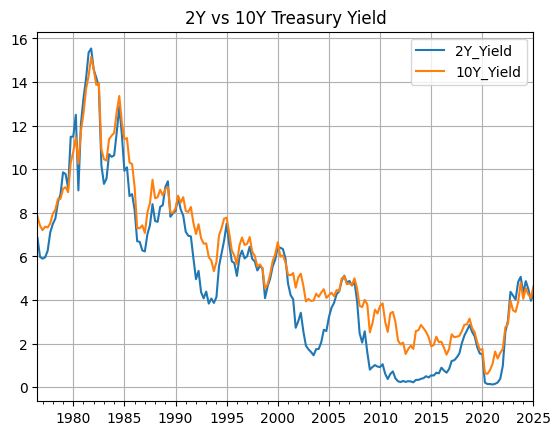

,GDP,CPI,Unemployment,FedFunds,2Y_Yield,10Y_Yield
2024-01-01,28624.069,309.794,3.7,5.33,4.32,4.06
2024-04-01,29016.714,313.016,3.9,5.33,4.87,4.54
2024-07-01,29374.914,313.566,4.2,5.33,4.50,4.25
2024-10-01,29723.864,315.564,4.1,4.83,3.97,4.10
2025-01-01,29962.047,319.086,4.0,4.33,4.27,4.63


In [5]:
start = '2005-01-01'
end = '2024-12-31'
data = pd.DataFrame({
    'GDP': fred.get_series('GDP'),
    'CPI': fred.get_series('CPIAUCSL'),
    'Unemployment': fred.get_series('UNRATE'),
    'FedFunds': fred.get_series('FEDFUNDS'),
    '2Y_Yield': fred.get_series('GS2'),
    '10Y_Yield': fred.get_series('GS10'),
})
data = data.dropna()
data[['2Y_Yield', '10Y_Yield']].plot(title='2Y vs 10Y Treasury Yield')
plt.grid(True)
plt.show()
data.tail()


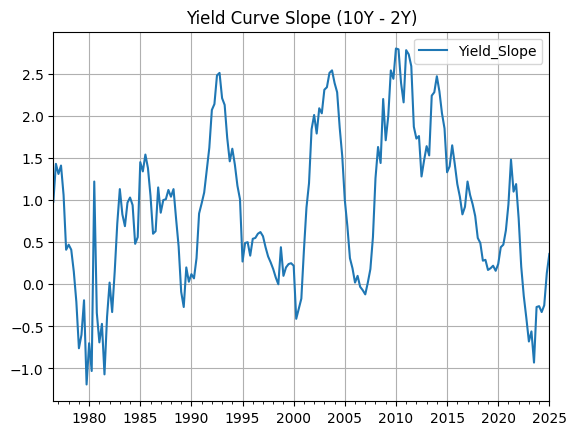

In [6]:
data['Yield_Slope'] = data['10Y_Yield'] - data['2Y_Yield']
data[['Yield_Slope']].plot(title='Yield Curve Slope (10Y - 2Y)')
plt.grid(True)
plt.show()


In [7]:
data.to_csv('macro_yield_data.csv')
from google.colab import files
files.download('macro_yield_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
import pandas as pd
data = pd.read_csv('macro_yield_data.csv', index_col=0)
data.dropna(inplace=True)
data.tail()


,GDP,CPI,Unemployment,FedFunds,2Y_Yield,10Y_Yield,Yield_Slope
2024-01-01,28624.069,309.794,3.7,5.33,4.32,4.06,-0.26
2024-04-01,29016.714,313.016,3.9,5.33,4.87,4.54,-0.33
2024-07-01,29374.914,313.566,4.2,5.33,4.50,4.25,-0.25
2024-10-01,29723.864,315.564,4.1,4.83,3.97,4.10,0.13
2025-01-01,29962.047,319.086,4.0,4.33,4.27,4.63,0.36


In [9]:
X = data[['GDP', 'CPI', 'Unemployment', 'FedFunds']]
y_2y = data['2Y_Yield']
y_10y = data['10Y_Yield']
y_slope = data['Yield_Slope']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_2y, y_test_2y = train_test_split(X, y_2y, test_size=0.2, random_state=42)
_, _, y_train_10y, y_test_10y = train_test_split(X, y_10y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model_2y = RandomForestRegressor(random_state=42)
model_10y = RandomForestRegressor(random_state=42)
model_2y.fit(X_train, y_train_2y)
model_10y.fit(X_train, y_train_10y)

RandomForestRegressor(random_state=42)

In [12]:
pred_2y = model_2y.predict(X_test)
r2_2y = r2_score(y_test_2y, pred_2y)
pred_10y = model_10y.predict(X_test)
r2_10y = r2_score(y_test_10y, pred_10y)

print(f"R² Score for 2Y Yield: {r2_2y:.3f}")
print(f"R² Score for 10Y Yield: {r2_10y:.3f}")


R² Score for 2Y Yield: 0.985
R² Score for 10Y Yield: 0.978


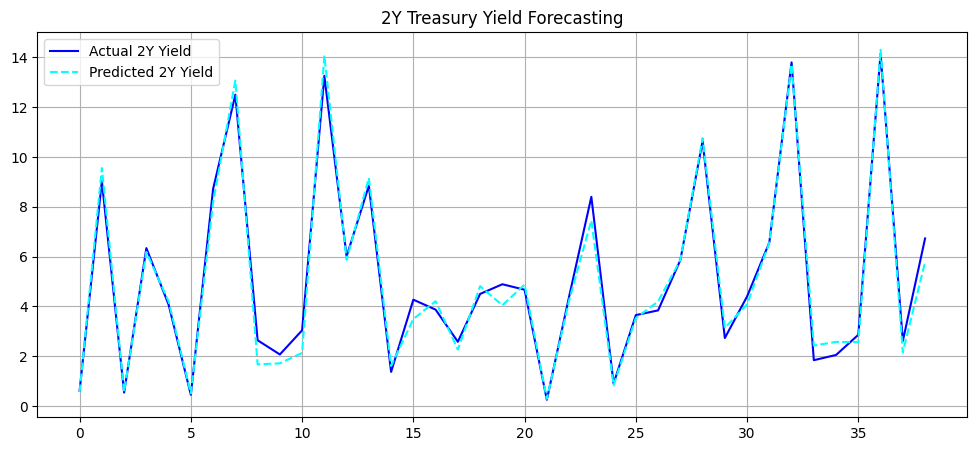

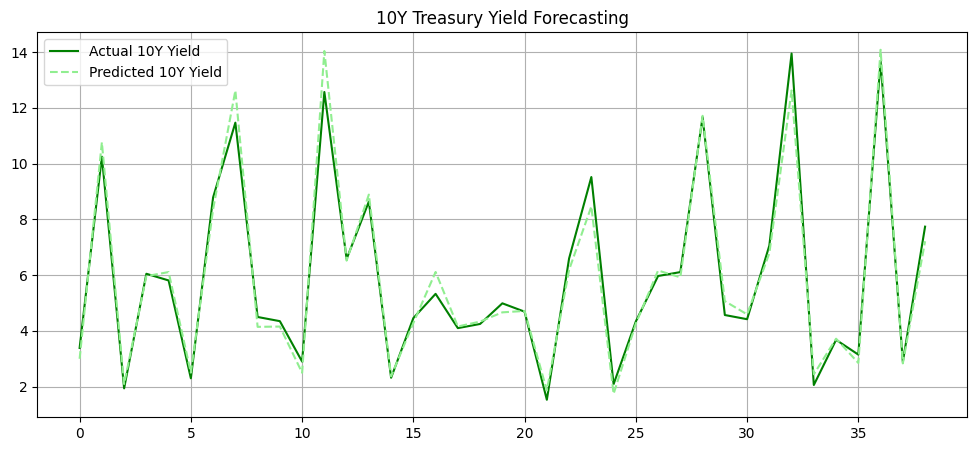

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(y_test_2y.values, label='Actual 2Y Yield', color='blue')
plt.plot(pred_2y, label='Predicted 2Y Yield', linestyle='--', color='cyan')
plt.title("2Y Treasury Yield Forecasting")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12,5))
plt.plot(y_test_10y.values, label='Actual 10Y Yield', color='green')
plt.plot(pred_10y, label='Predicted 10Y Yield', linestyle='--', color='lightgreen')
plt.title("10Y Treasury Yield Forecasting")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
print(f"Final R² Scores — 2Y: {r2_2y:.3f}, 10Y: {r2_10y:.3f}")


Final R² Scores — 2Y: 0.985, 10Y: 0.978


In [15]:
import yfinance as yf
import pandas as pd
eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
eurusd.name = 'EURUSD'
usdjpy.name = 'USDJPY'
fx_data = pd.concat([eurusd, usdjpy], axis=1)
fx_data.dropna(inplace=True)
fx_data.tail()

/tmp/ipython-input-15-2988057598.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-15-2988057598.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,EURUSD=X,JPY=X
Date,,
2024-08-01,1.106195,146.149994
2024-09-01,1.116982,142.783005
2024-10-01,1.085918,153.203995
2024-11-01,1.058089,149.746002
2024-12-01,1.040615,156.994995


In [16]:
macro = pd.read_csv("macro_yield_data.csv", index_col=0, parse_dates=True)
macro = macro[['GDP', 'CPI', 'Unemployment', 'FedFunds', 'Yield_Slope']]
macro = macro.resample('M').ffill()
macro.tail()


/tmp/ipython-input-16-2369246533.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  macro = macro.resample('M').ffill()


,GDP,CPI,Unemployment,FedFunds,Yield_Slope
2024-09-30,29374.914,313.566,4.2,5.33,-0.25
2024-10-31,29723.864,315.564,4.1,4.83,0.13
2024-11-30,29723.864,315.564,4.1,4.83,0.13
2024-12-31,29723.864,315.564,4.1,4.83,0.13
2025-01-31,29962.047,319.086,4.0,4.33,0.36


In [17]:
fx_data.index = pd.to_datetime(fx_data.index)
fx_data = fx_data.resample('M').ffill()

/tmp/ipython-input-17-1733571758.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fx_data = fx_data.resample('M').ffill()


In [18]:
merged = macro.join(fx_data, how='inner')
merged.dropna(inplace=True)
merged.tail()


,GDP,CPI,Unemployment,FedFunds,Yield_Slope,EURUSD=X,JPY=X
2024-08-31,29374.914,313.566,4.2,5.33,-0.25,1.106195,146.149994
2024-09-30,29374.914,313.566,4.2,5.33,-0.25,1.116982,142.783005
2024-10-31,29723.864,315.564,4.1,4.83,0.13,1.085918,153.203995
2024-11-30,29723.864,315.564,4.1,4.83,0.13,1.058089,149.746002
2024-12-31,29723.864,315.564,4.1,4.83,0.13,1.040615,156.994995


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged[['Yield_Slope', 'EURUSD', 'USDJPY']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Yield Slope vs FX Rates")
plt.show()


KeyError: "['EURUSD', 'USDJPY'] not in index"

In [20]:
merged.columns = ['GDP', 'CPI', 'Unemployment', 'FedFunds', 'Yield_Slope', 'EURUSD', 'USDJPY']


In [22]:
merged[['Yield_Slope', 'EURUSD', 'USDJPY']].head()

,Yield_Slope,EURUSD,USDJPY
2005-01-31,1.00,1.305193,103.599998
2005-02-28,1.00,1.321702,104.529999
2005-03-31,1.00,1.296697,107.139999
2005-04-30,0.69,1.292307,104.620003
2005-05-31,0.69,1.230800,108.400002


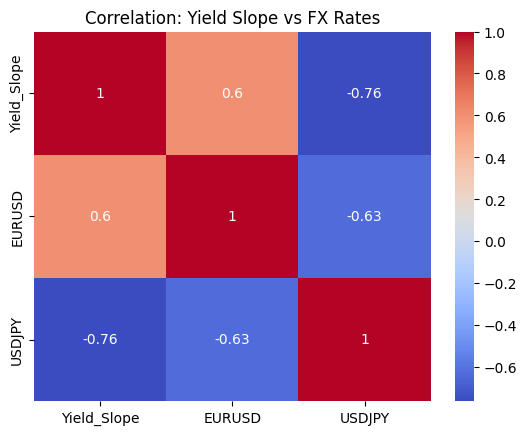

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(merged[['Yield_Slope', 'EURUSD', 'USDJPY']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Yield Slope vs FX Rates")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

X = merged[['Yield_Slope']]
y_eur = merged['EURUSD']
model_eur = LinearRegression().fit(X, y_eur)
r2_eur = model_eur.score(X, y_eur)
y_jpy = merged['USDJPY']
model_jpy = LinearRegression().fit(X, y_jpy)
r2_jpy = model_jpy.score(X, y_jpy)
print(f"EURUSD R²: {r2_eur:.3f}")
print(f"USDJPY R²: {r2_jpy:.3f}")

EURUSD R²: 0.365
USDJPY R²: 0.583


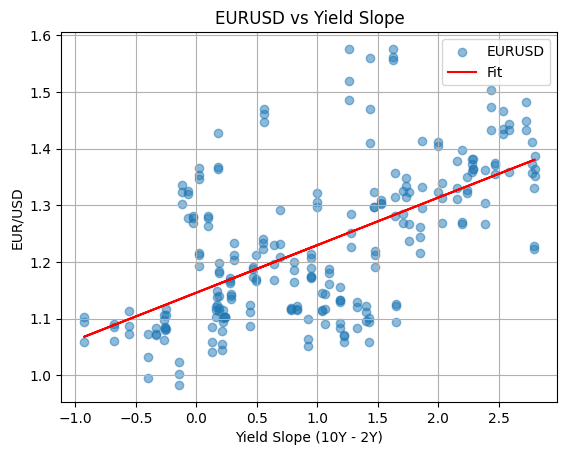

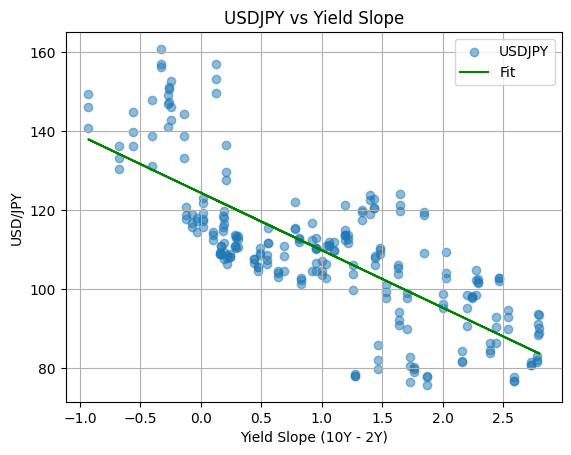

In [24]:
plt.scatter(X, y_eur, alpha=0.5, label="EURUSD")
plt.plot(X, model_eur.predict(X), color='red', label="Fit")
plt.title("EURUSD vs Yield Slope")
plt.xlabel("Yield Slope (10Y - 2Y)")
plt.ylabel("EUR/USD")
plt.grid(True)
plt.legend()
plt.show()
plt.scatter(X, y_jpy, alpha=0.5, label="USDJPY")
plt.plot(X, model_jpy.predict(X), color='green', label="Fit")
plt.title("USDJPY vs Yield Slope")
plt.xlabel("Yield Slope (10Y - 2Y)")
plt.ylabel("USD/JPY")
plt.grid(True)
plt.legend()
plt.show()

In [25]:
eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
eurusd = eurusd.resample('M').last()
eurusd.name = 'EURUSD'
usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
usdjpy = usdjpy.resample('M').last()
usdjpy.name = 'USDJPY'
fx_data = pd.concat([eurusd, usdjpy], axis=1)
fx_data.dropna(inplace=True)
fx_data.tail()

/tmp/ipython-input-25-815195920.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-815195920.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eurusd = eurusd.resample('M').last()
/tmp/ipython-input-25-815195920.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-25-815195920.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usdjpy = usdjpy.resample('M').last()


Ticker,EURUSD=X,JPY=X
Date,,
2024-08-31,1.108045,144.889999
2024-09-30,1.116982,142.783005
2024-10-31,1.085918,153.203995
2024-11-30,1.056301,151.173996
2024-12-31,1.042938,157.873001


In [26]:
sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
sp500.name = 'SP500'
returns = pd.concat([fx_data['EURUSD=X'], sp500], axis=1).dropna()
print(returns.columns)

/tmp/ipython-input-26-1614885040.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
[*********************100%***********************]  1 of 1 completed

Index(['EURUSD=X', '^GSPC'], dtype='object')


In [27]:
returns.columns = ['EURUSD', 'SP500']

In [34]:
import numpy as np

returns['USD_Return'] = np.log(returns['SP500'] / returns['SP500'].shift(1))
returns['FX_Change'] = np.log(returns['EURUSD'] / returns['EURUSD'].shift(1))
returns['Unhedged'] = returns['USD_Return'] + returns['FX_Change']
returns.dropna(inplace=True)
returns.tail()


,EURUSD,SP500,USD_Return,FX_Change,Unhedged
Date,,,,,


In [32]:
import yfinance as yf
import pandas as pd
eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
eurusd = eurusd.resample('M').last()
usdjpy = usdjpy.resample('M').last()
eurusd.name = 'EURUSD'
usdjpy.name = 'USDJPY'
fx_data = pd.concat([eurusd, usdjpy], axis=1)
fx_data.dropna(inplace=True)
fx_data.tail()


/tmp/ipython-input-32-2877115338.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-32-2877115338.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usdjpy = yf.download('JPY=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-32-2877115338.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eurusd = eurusd.resample('M').last()
/tmp/ipython-input-32-2877115338.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usdjpy = usdjpy.resample('M').last()


Ticker,EURUSD=X,JPY=X
Date,,
2024-08-31,1.108045,144.889999
2024-09-30,1.116982,142.783005
2024-10-31,1.085918,153.203995
2024-11-30,1.056301,151.173996
2024-12-31,1.042938,157.873001


In [36]:
sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
sp500.name = 'SP500'
returns = pd.concat([fx_data['EURUSD=X'], sp500], axis=1).dropna()
print(returns.columns)


/tmp/ipython-input-36-4231857309.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1mo')['Close']
[*********************100%***********************]  1 of 1 completed

Index(['EURUSD=X', '^GSPC'], dtype='object')


In [48]:
eurusd = fx_data['EURUSD=X']
eurusd.name = 'EURUSD'

sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
sp500.name = 'SP500'

returns = pd.concat([eurusd, sp500], axis=1).dropna()
print(returns.columns)

returns.columns = ['EURUSD', 'SP500']

print(returns.columns)

/tmp/ipython-input-48-4031037116.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed

Index(['EURUSD', '^GSPC'], dtype='object')
Index(['EURUSD', 'SP500'], dtype='object')


In [49]:
import numpy as np

returns['USD_Return'] = np.log(returns['SP500'] / returns['SP500'].shift(1))
returns['FX_Change'] = np.log(returns['EURUSD'] / returns['EURUSD'].shift(1))
returns['Unhedged'] = returns['USD_Return'] + returns['FX_Change']

returns.dropna(inplace=True)
returns.tail()


,EURUSD,SP500,USD_Return,FX_Change,Unhedged
Date,,,,,
2024-04-30,1.071570,5035.689941,-0.011958,-0.011424,-0.023382
2024-05-31,1.083541,5277.509766,0.046904,0.011109,0.058013
2024-07-31,1.081607,5522.299805,0.045340,-0.001786,0.043554
2024-09-30,1.116982,5762.479980,0.042574,0.032182,0.074755
2024-10-31,1.085918,5705.450195,-0.009946,-0.028204,-0.038150


In [67]:
import yfinance as yf
eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
sp500 = yf.download('^GSPC', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
eurusd.name = 'EURUSD'
sp500.name = 'SP500'
returns = pd.concat([eurusd, sp500], axis=1).dropna()
print(returns.head())


/tmp/ipython-input-67-1582537132.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download('EURUSD=X', start='2005-01-01', end='2024-12-31', interval='1d')['Close']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker      EURUSD=X        ^GSPC
Date                             
2005-01-03  1.347001  1202.079956
2005-01-04  1.328198  1188.050049
2005-01-05  1.328004  1183.739990
2005-01-06  1.318305  1187.890015
2005-01-07  1.306097  1186.189941


In [69]:
returns.columns = ['EURUSD', 'SP500']
print(returns.columns)

Index(['EURUSD', 'SP500'], dtype='object')


In [70]:
import numpy as np

returns['USD_Return'] = np.log(returns['SP500'] / returns['SP500'].shift(1))
returns['FX_Change'] = np.log(returns['EURUSD'] / returns['EURUSD'].shift(1))
returns['Unhedged'] = returns['USD_Return'] + returns['FX_Change']
returns.dropna(inplace=True)
returns.head()


,EURUSD,SP500,USD_Return,FX_Change,Unhedged
Date,,,,,
2005-01-04,1.328198,1188.050049,-0.011740,-0.014058,-0.025798
2005-01-05,1.328004,1183.739990,-0.003634,-0.000146,-0.003780
2005-01-06,1.318305,1187.890015,0.003500,-0.007330,-0.003831
2005-01-07,1.306097,1186.189941,-0.001432,-0.009303,-0.010736
2005-01-10,1.310994,1190.250000,0.003417,0.003743,0.007159


In [71]:
fed = pd.read_csv('macro_yield_data.csv', index_col=0, parse_dates=True)['FedFunds']
fed = fed.asfreq('D').ffill()
fed = fed.loc[returns.index]


In [72]:
eur_rate = 0.005
irp_forward_daily = (fed / 100 - eur_rate) / 252

returns['Hedged'] = returns['USD_Return'] + irp_forward_daily.values
returns.tail()


,EURUSD,SP500,USD_Return,FX_Change,Unhedged,Hedged
Date,,,,,,
2024-12-23,1.043308,5974.069824,0.007261,0.006551,0.013812,0.007433
2024-12-24,1.040583,6040.040039,0.010982,-0.002615,0.008367,0.011154
2024-12-26,1.039955,6037.589844,-0.000406,-0.000603,-0.001009,-0.000234
2024-12-27,1.042318,5970.839844,-0.011117,0.002270,-0.008848,-0.010945
2024-12-30,1.042938,5906.939941,-0.010760,0.000594,-0.010165,-0.010588


<Axes: title={'center': 'Daily Cumulative Returns'}, xlabel='Date'>

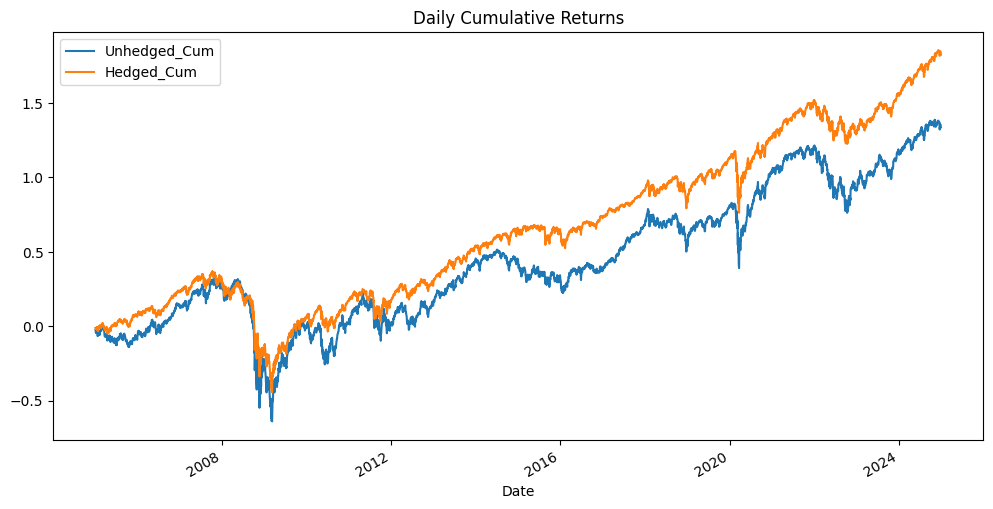

In [73]:
returns['Unhedged_Cum'] = returns['Unhedged'].cumsum()
returns['Hedged_Cum'] = returns['Hedged'].cumsum()

returns[['Unhedged_Cum', 'Hedged_Cum']].plot(figsize=(12, 6), title='Daily Cumulative Returns')


In [95]:
vol_hedged = returns['Hedged'].std() * np.sqrt(252)
vol_unhedged = returns['Unhedged'].std() * np.sqrt(252)

sharpe_hedged = returns['Hedged'].mean() / returns['Hedged'].std() * np.sqrt(252)
sharpe_unhedged = returns['Unhedged'].mean() / returns['Unhedged'].std() * np.sqrt(252)

print(f" Volatility (Annual):")
print(f" Unhedged: {vol_unhedged:.2%}")
print(f" Hedged:   {vol_hedged:.2%}")

print(f"\n Sharpe Ratio:")
print(f"  Unhedged: {sharpe_unhedged:.2f}")
print(f"  Hedged:   {sharpe_hedged:.2f}")


 Volatility (Annual):
 Unhedged: 23.63%
 Hedged:   19.23%

 Sharpe Ratio:
  Unhedged: 0.28
  Hedged:   0.48


In [78]:
cum_return_unhedged = np.exp(returns['Unhedged'].sum()) - 1
cum_return_hedged = np.exp(returns['Hedged'].sum()) - 1

retention = (cum_return_hedged / cum_return_unhedged) * 100

print(f"Performance retained: {retention:.2f}%")


Performance retained: 185.44%


In [79]:
sharpe_retention = (sharpe_hedged / sharpe_unhedged) * 100
print(f"Sharpe ratio retention: {sharpe_retention:.2f}%")


Sharpe ratio retention: 167.82%
